In [223]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [224]:
path = os.listdir(r'C:\Users\ashu1\OneDrive\Desktop\My Projects Data\Chest_Images\chest_xray')

In [225]:
train  = r'C:\Users\ashu1\OneDrive\Desktop\My Projects Data\Chest_Images\chest_xray\train'
val  = r'C:\Users\ashu1\OneDrive\Desktop\My Projects Data\Chest_Images\chest_xray\val'
test  = r'C:\Users\ashu1\OneDrive\Desktop\My Projects Data\Chest_Images\chest_xray\test'

In [226]:
train_n = train + r'\NORMAL'
train_p = train + r'\PNEUMONIA'

In [227]:
rand_n = random.choice(os.listdir(train_n))
rand_p = random.choice(os.listdir(train_p))
image_n = os.path.join(train_n, rand_n)
image_p = os.path.join(train_p, rand_p)

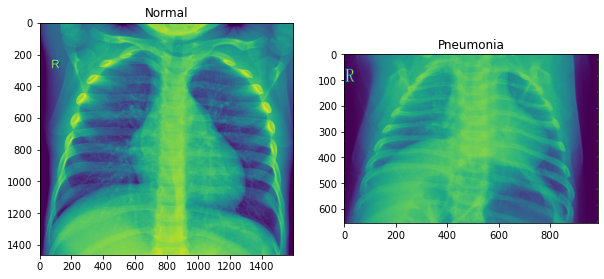

In [228]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(image_n))
plt.title("Normal")

plt.subplot(1, 2, 2)
plt.imshow(Image.open(image_p))
plt.title("Pneumonia")
plt.show();

In [229]:
img = cv2.imread(image_n)
img.shape

(1464, 1600, 3)

In [230]:
import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization, SeparableConv2D, Flatten

In [231]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape = (64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu", units=128))
model.add(Dropout(0.2))
model.add(Dense(activation="sigmoid", units=1))

model.compile(optimizer = "RMSProp", loss= "binary_crossentropy", metrics = ["accuracy"])

In [232]:
batch_size = 32
EPOCHS = 15

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose =1, factor = 0.3, min_lr = 0.000001)

In [233]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  horizontal_flip = True,
                  zoom_range = 0.2,
                  shear_range = 0.2,
                  rotation_range = 45,
                  width_shift_range = 0.1,          
                  height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train, target_size = (64, 64),
                                 batch_size = 32, class_mode = 'binary')

valid_set = test_datagen.flow_from_directory(val, target_size = (64, 64),
                                 batch_size = 32, class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test, target_size = (64, 64),
                                 batch_size = 32, class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [234]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
dropout_10 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)       

In [235]:
model.fit(training_set, epochs = EPOCHS, validation_data = valid_set, callbacks= [learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - 74s 453ms/step - loss: 0.3683 - accuracy: 0.8510 - val_loss: 4.8397 - val_accuracy: 0.5000
Epoch 2/15
163/163 [==============================] - 73s 451ms/step - loss: 0.2643 - accuracy: 0.8882 - val_loss: 7.9712 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 73s 447ms/step - loss: 0.2319 - accuracy: 0.9051 - val_loss: 7.9712 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/15
163/163 [==============================] - 80s 492ms/step - loss: 0.1871 - accuracy: 0.9264 - val_loss: 0.6161 - val_accuracy: 0.6250
Epoch 5/15
163/163 [==============================] - 75s 457ms/step - loss: 0.1765 - accuracy: 0.9348 - val_loss: 0.9203 - val_accuracy: 0.6875
Epoch 6/15
163/163 [==============================] - 73s 448ms/step - loss: 0.1680 - accuracy: 0.9344 - val_loss: 1.0757 - val_accuracy: 0.6875
Epoch 7/15
163/163 [=============================

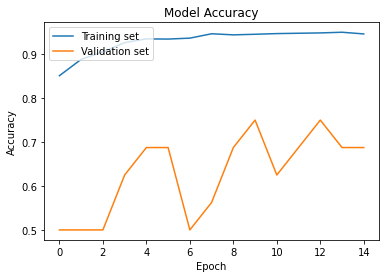

In [236]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training set', 'Validation set'], loc = 'upper left')
plt.show()

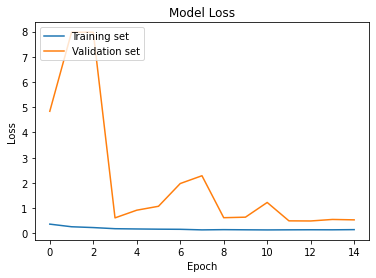

In [237]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training set', 'Validation set'], loc = 'upper left')
plt.show()

In [238]:
test_accuracy = model.evaluate_generator(test_set)

In [239]:
print("Accuracy", test_accuracy[1]*100, "%")

Accuracy 89.90384340286255 %
